Equation of ray is [1],

$$P(t) = E + tD$$

where $E$ is the origin or "eye" point and $D$ is the direction vector. In component form,

$$
\begin{bmatrix}
x(t) \\
y(t) \\
z(t) \\ 
\end{bmatrix} = 
\begin{bmatrix}
x_E + t x_D \\
y_E + t y_D \\
z_E + t z_D\\ 
\end{bmatrix}
$$

The equation of cylinder aligned along the z direction is,

$$
x^2 + y^2 = R^2
$$

where $R$ is the radius of the cylinder.

Substituting the equation of the ray into the equation of the cylinder,

$$
(x_E + t x_D)^2 + (y_E + t y_D)^2 = R^2
$$

and after grouping the $t^2$ and $t$ terms,

$$
t^2\left(x_D^2 + y_D^2\right) + t \left(2 x_E x_D + 2 y_E y _D \right) + \left( x_E^2 + y_E^2 - R^2 \right) = 0
$$

which is a standard quadratic equation,

$$
at^2 + bt + c = 0
$$

Solution of this equation give two values $\left( t_1, t_2 \right)$ which give the ray's distance to intersection points. To be ahead on the ray's path $\left( t_1, t_2 \right) >= 0$ and to be real intersection points the values must be finite and have imaginary component of zero. 

The intersection with the cylinder caps is found by intersecting the ray with two infinite planes at $z=0$ and $z=L$, where $L$ is the length of the cylinder. The ray-plane intersection is given by [2],

$$
t = \frac{(Q - P) \cdot n}{D \cdot n}
$$

where $t$ is the distance from the ray origin to the intersection point, $Q$ is a point on the plane and $n$ the **outward** facing surface normal at that point. As before $P$ is the origin of the ray and $D$ is the ray's direction unit vector.

For the bottom cap at $z=0$,

$$
    t_{\text{bot}} = 
    \frac{
    \left(
        \begin{bmatrix}
        0 \\
        0 \\
        0 \\ 
        \end{bmatrix} - 
    \begin{bmatrix}
        x_E \\
        y_E \\
        z_E \\ 
    \end{bmatrix}
    \right) \cdot 
    \begin{bmatrix}
        0 \\
        0 \\
        -1 \\ 
    \end{bmatrix}
    }{
    \begin{bmatrix}
        x_D \\
        y_D \\
        z_D \\ 
    \end{bmatrix} \cdot
    \begin{bmatrix}
        0 \\
        0 \\
        -1 \\ 
    \end{bmatrix}
    }
$$

and for the top cap at $z=L$,

$$
    t_{\text{bot}} = 
    \frac{
    \left(
        \begin{bmatrix}
        0 \\
        0 \\
        L \\ 
        \end{bmatrix} - 
    \begin{bmatrix}
        x_E \\
        y_E \\
        z_E \\ 
    \end{bmatrix}
    \right) \cdot 
    \begin{bmatrix}
        0 \\
        0 \\
        1 \\ 
    \end{bmatrix}
    }{
    \begin{bmatrix}
        x_D \\
        y_D \\
        z_D \\ 
    \end{bmatrix} \cdot
    \begin{bmatrix}
        0 \\
        0 \\
        1 \\ 
    \end{bmatrix}
    }
$$

The intersection points with $t<0$ and points not contained inside the circle of the end cap are rejected using $(x^2 + y^2) < R$, where $x$ and $y$ are the components of the candidate intersection point.

In [1]:
import numpy as np
from sympy import *
init_printing()

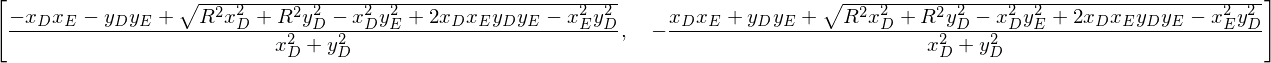

In [2]:
xE, yE, xD, yD, t, R = var("x_E y_E x_D y_D t R")
sols = solve(Eq((xE + t*xD)**2 + (yE + t*yD)**2, R**2), t)
sols

In [3]:
pos = np.array([0, 0, 0.5])
uvec = np.array([0.9, 0, 0.01])
uvec = uvec / np.linalg.norm(uvec)
radius = 1.0
tsols = [float(asol.subs({xE: pos[0], yE: pos[1], xD: uvec[0], yD: uvec[1], R: radius})) 
 for asol in sols]
tsols

In [4]:
L = 1
ipoints = [np.array(pos + t * uvec) for t in tsols if t > 0]
ipoints = [point for point in ipoints if point[2] > 0 and point[2] < L]
ipoints

[array([1.        , 0.        , 0.51111111])]

For cylinder with length L filter solutions inside range, $0 < z < L$. This assumes the cylinder starts at $z=0$ and ends at $z=L$.

The intersection with ends caps.

We will work out the intersection with infinite planes at the end cap positions and then see if the intersection point is inside a circle on the surface of the plane.

The intersection with ray with a infinite xy-plane is,

$$
t = \frac{C_z-E_z}{D_z}
$$

where $C_z$ is the $z$ location of the plane.

This comes from the more general intersection formular described here https://www.scratchapixel.com/lessons/3d-basic-rendering/minimal-ray-tracer-rendering-simple-shapes/ray-plane-and-ray-disk-intersection

If the intersection point lies inside a cap circle then we include the intersection point in the list.

In [5]:
cap_ipoints = []
for z in (0.0, L):
    with np.errstate(divide='ignore'):
        t = (z - pos[2])/uvec[2]
        if np.isfinite(t):
            point = np.array(pos + t * uvec)
            if np.sqrt(point[0]**2 + point[1]**2) < radius:
                cap_ipoints.append(point)
cap_ipoints

In [6]:
def ray_z_cylinder(length, radius, ray_origin, ray_direction):
    """ Returns ray-cylinder intersection points for a cylinder aligned
        along the z-axis with centre at (0, 0, 0).
        
        Parameters
        ----------
        length : float
            The length of the cylinder
        radius : float
            The radius of the cylinder
        ray_origin : tuple of float
            The origin of th ray like, e.g. :math:`\left((0.0, 1.0, 2.0 \right)`
        ray_direction : tuple of float
            The direction **unit** vector of the ray like, e.g. :math:`(n_x, n_y, n_z)`.
        
        Returns
        -------
        points: tuple of points
            Returns a tuple of tuple like ((0.0, 1.0, 2.0), ...) where each item is an 
            intersection point. The tuple is sorted by distance from the ray origin.
            
        Notes
        -----
        
        Equation of ray is [1],

        :math:`P(t) = E + t`

        where :math:`E` is the origin or "eye" point and :math:`D` is the direction vector. 
        In component form,

        .. math::

            \begin{bmatrix}
            x(t) \\
            y(t) \\
            z(t) \\ 
            \end{bmatrix} = 
            \begin{bmatrix}
            x_E + t x_D \\
            y_E + t y_D \\
            z_E + t z_D\\ 
            \end{bmatrix}

        The equation of cylinder aligned along the z direction is,

        .. math::

            x^2 + y^2 = R^2
        

        where :math`R` is the radius of the cylinder.

        Substituting the equation of the ray into the equation of the cylinder,

        .. math::
        
            (x_E + t x_D)^2 + (y_E + t y_D)^2 = R^2

        and after grouping the :math:`t^2` and :math:`t` terms,

        .. math::
        
            t^2\left(x_D^2 + y_D^2\right) + 
            t \left(2 x_E x_D + 2 y_E y _D \right) + 
            \left( x_E^2 + y_E^2 - R^2 \right) = 0

        which is a standard quadratic equation,

        .. math::
            
            at^2 + bt + c = 0

        Solution of this equation give two values :math:`\left( t_1, t_2 \right)` which 
        give the ray's distance to intersection points. To be ahead on the ray's path 
        $\left( t_1, t_2 \right) >= 0$ and to be real intersection points the values 
        must be finite and have imaginary component of zero. 

        The intersection with the cylinder caps is found by intersecting the ray with 
        two infinite planes at $z=0$ and $z=L$, where $L$ is the length of the cylinder. 
        The ray-plane intersection is given by [2],

        .. math::
        
            t = \frac{(Q - P) \cdot n}{D \cdot n}

        where :math:`t` is the distance from the ray origin to the intersection point, 
        :math:`Q` is a point on the plane and :math:`n` the **outward** facing surface 
        normal at that point. As before :math:`P` is the origin of the ray and :math:`D`
        is the ray's direction unit vector.

        For the bottom cap at :math:`z=0`,

        .. math::

            t_{\text{bot}} = 
            \frac{
            \left(
                \begin{bmatrix}
                0 \\
                0 \\
                -0.5 L \\ 
                \end{bmatrix} - 
            \begin{bmatrix}
                x_E \\
                y_E \\
                z_E \\ 
            \end{bmatrix}
            \right) \cdot 
            \begin{bmatrix}
                0 \\
                0 \\
                -1 \\ 
            \end{bmatrix}
            }{
            \begin{bmatrix}
                x_D \\
                y_D \\
                z_D \\ 
            \end{bmatrix} \cdot
            \begin{bmatrix}
                0 \\
                0 \\
                -1 \\ 
            \end{bmatrix}
            }

        and for the top cap at :math:`z=L`,

        .. math::
            t_{\text{bot}} = 
            \frac{
            \left(
                \begin{bmatrix}
                0 \\
                0 \\
                0.5 L \\ 
                \end{bmatrix} - 
            \begin{bmatrix}
                x_E \\
                y_E \\
                z_E \\ 
            \end{bmatrix}
            \right) \cdot 
            \begin{bmatrix}
                0 \\
                0 \\
                1 \\ 
            \end{bmatrix}
            }{
            \begin{bmatrix}
                x_D \\
                y_D \\
                z_D \\ 
            \end{bmatrix} \cdot
            \begin{bmatrix}
                0 \\
                0 \\
                1 \\ 
            \end{bmatrix}
            }
    

        The intersection points with :math:`t<0` and points not contained inside the circle
        of the end cap are rejected using $(x^2 + y^2) < R$, where $x$ and $y$ are the
        components of the candidate intersection point.
        
        References
        ----------
        [1] https://www.cl.cam.ac.uk/teaching/1999/AGraphHCI/
        [2] https://www.scratchapixel.com/lessons/3d-basic-rendering/minimal-ray-tracer-rendering-simple-shapes/ray-plane-and-ray-disk-intersection
        
    """
    p0 = np.array(ray_origin)
    n0 = np.array(ray_direction)
    xe, ye, ze = p0
    xd, yd, zd = n0

    # Look for intersections on the cylinder surface
    a = xd**2 + yd**2
    b = 2 * (xe*xd + ye*yd)
    c = xe**2 + ye**2 - radius**2
    tcyl = [t for t in np.roots([a, b, c]) if np.isfinite(t) and np.isreal(t) and t >= 0]
        
    # Look for intersections on the cap surfaces
    with np.errstate(divide='ignore'):
        # top cap
        point = np.array([0.0, 0.0, 0.5*length])
        normal = np.array([0.0, 0.0, 1.0]) # outward facing at z = length
        ttopcap = (point - p0).dot(normal) / n0.dot(normal)
        # bottom cap
        point = np.array([0.0, 0.0, -0.5*length])
        normal = np.array([0.0, 0.0, -1.0]) # outward facing at z = 0
        tbotcap = (point - p0).dot(normal) / n0.dot(normal)
        tcap = [t for t in (tbotcap, ttopcap) if np.isfinite(t) and t >= 0.0]
    
    # Reject point cap points which are not in the cap's circle radius
    # and cylinder points which outside the length.
    cap_candidates = [(p0 + t * n0, t) for t in tcap]
    cap_candidates = [(point, t) for (point, t) in cap_candidates
                      if np.sqrt(point[0]**2 + point[1]**2) < radius]
    cyl_candidates = [(p0 + t * n0, t) for t in tcyl]
    cyl_candidates = [(point, t) for (point, t) in cyl_candidates if point[2] > -0.5*length and point[2] < 0.5*length]
    intersection_info = tuple(cyl_candidates) + tuple(cap_candidates)
    intersection_info = sorted(intersection_info, key=lambda pair: pair[1])
    points = tuple([tuple(p.tolist()) for p in list(zip(*intersection_info))[0]])
    return points

In [7]:
import numpy as np
import meshcat
import meshcat.geometry as g
import meshcat.transformations as tf
vis = meshcat.visualizer.Visualizer()

def norm(v):
    return v / np.linalg.norm(v)

vis.delete()
# touching
ray_origin = (0.0, 0.0, -1.5)
ray_direction = norm((0.0, 1.0, 1.0))
expected = ((0.0, 1.0, -0.5),)
touching = (ray_origin, ray_direction, expected)
# end caps only
ray_origin = (0.2, 0.2, -1)
ray_direction = norm((0.0, 0.0, 1.0))
expected = ((0.2, 0.2, -0.5), (0.2, 0.2, 0.5))
end_caps_only = (ray_origin, ray_direction, expected)
# surface and bottom
ray_origin = (-2, 0.2, 0.0)
ray_direction = norm((1.0, 0.2, -0.2))
expected = (
    (-0.9082895433880116, 0.41834209132239775, -0.2183420913223977),
    (0.5, 0.7, -0.5)
)
surface_and_bottom = (ray_origin, ray_direction, expected)
# surface and top
ray_origin = (-2, 0.2, 0.0)
ray_direction = norm((1.0, 0.2, 0.2))
expected = (
    (-0.9082895433880116, 0.41834209132239775, 0.2183420913223977),
    (0.5, 0.7, 0.5)
)
surface_and_top = (ray_origin, ray_direction, expected)
tests = (touching, end_caps_only, surface_and_bottom, surface_and_top)

# Place cylinder in scene
material = g.MeshLambertMaterial(reflectivity=1.0, sides=0)
vis['cyl'].set_object(
        g.Cylinder(length, radius),
        material)
vis['cyl'].set_transform(
    tf.translation_matrix([0.0, 0.0, 0.0]).dot(tf.rotation_matrix(np.radians(-90), [1, 0, 0]))
)

# Visualise test rays
for idx, (ray_origin, ray_direction, expected) in enumerate(tests):
    ray_inf = np.array(ray_origin) + 5.0 * np.array(ray_direction)
    vertices = np.column_stack((ray_origin, ray_inf))

    red_material = g.MeshLambertMaterial(reflectivity=1.0, sides=0, color=0xff0000)
    vis['line_{}'.format(idx)].set_object(g.Line(g.PointsGeometry(vertices)))
    points = ray_z_cylinder(length, radius, ray_origin, ray_direction)
    for ptidx, pt in enumerate(points):
        vis['point_{}_{}'.format(idx, ptidx)].set_object(
                g.Sphere(0.05),
                red_material)
        vis['point_{}_{}'.format(idx, ptidx)].set_transform(
            tf.translation_matrix(pt)
        )
    if np.allclose(points, expected, atol=1e-15):
        print(points)
        print("OK!")
vis.jupyter_cell()

You can open the visualizer by visiting the following URL:
http://127.0.0.1:7032/static/


NameError: name 'length' is not defined